In [10]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.colors import qualitative
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline

In [11]:
# Read the dataset
df = pd.read_csv("satisfaction.csv")
# Dropping the id column as it is not necessary
df = df.drop(columns=['id'])

# Renaming the columns for better readability
df = df.rename(columns={'satisfaction_v2': 'satisfaction'})
df = df.rename(columns={'Departure/Arrival time convenient': 'departure_arrival_time_convenient'})

# Lowercase all column names and replace spaces with underscores
df.columns = df.columns.str.lower().str.replace(' ', '_')
df = df.dropna(axis=0)

df.head()

,satisfaction,gender,customer_type,age,type_of_travel,class,flight_distance,seat_comfort,departure_arrival_time_convenient,food_and_drink,...,online_support,ease_of_online_booking,on-board_service,leg_room_service,baggage_handling,checkin_service,cleanliness,online_boarding,departure_delay_in_minutes,arrival_delay_in_minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [14]:
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied':0 , 'satisfied':1})
df['customer_type'] = df['customer_type'].map({'Loyal Customer':1, 'disloyal Customer':0})
df['type_of_travel'] = df['type_of_travel'].map({'Personal Travel':0, 'Business travel':1})
df['class'] = df['class'].map({'Eco':0, 'Eco Plus':1, 'Business':2})
df = df.drop(columns=['gender'])

In [16]:
# Data Splitting
X = df.drop(columns=['satisfaction'])
y = df['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [18]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# model = # Load your model
# decision tree and random forest 
# for decsiion tree, plot tree and after you train the model and for RF, show feature importances

Decision Tree Model:
Accuracy: 0.9352
Confusion Matrix:
[[5428  454]
 [ 385 6682]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5882
           1       0.94      0.95      0.94      7067

    accuracy                           0.94     12949
   macro avg       0.94      0.93      0.93     12949
weighted avg       0.94      0.94      0.94     12949



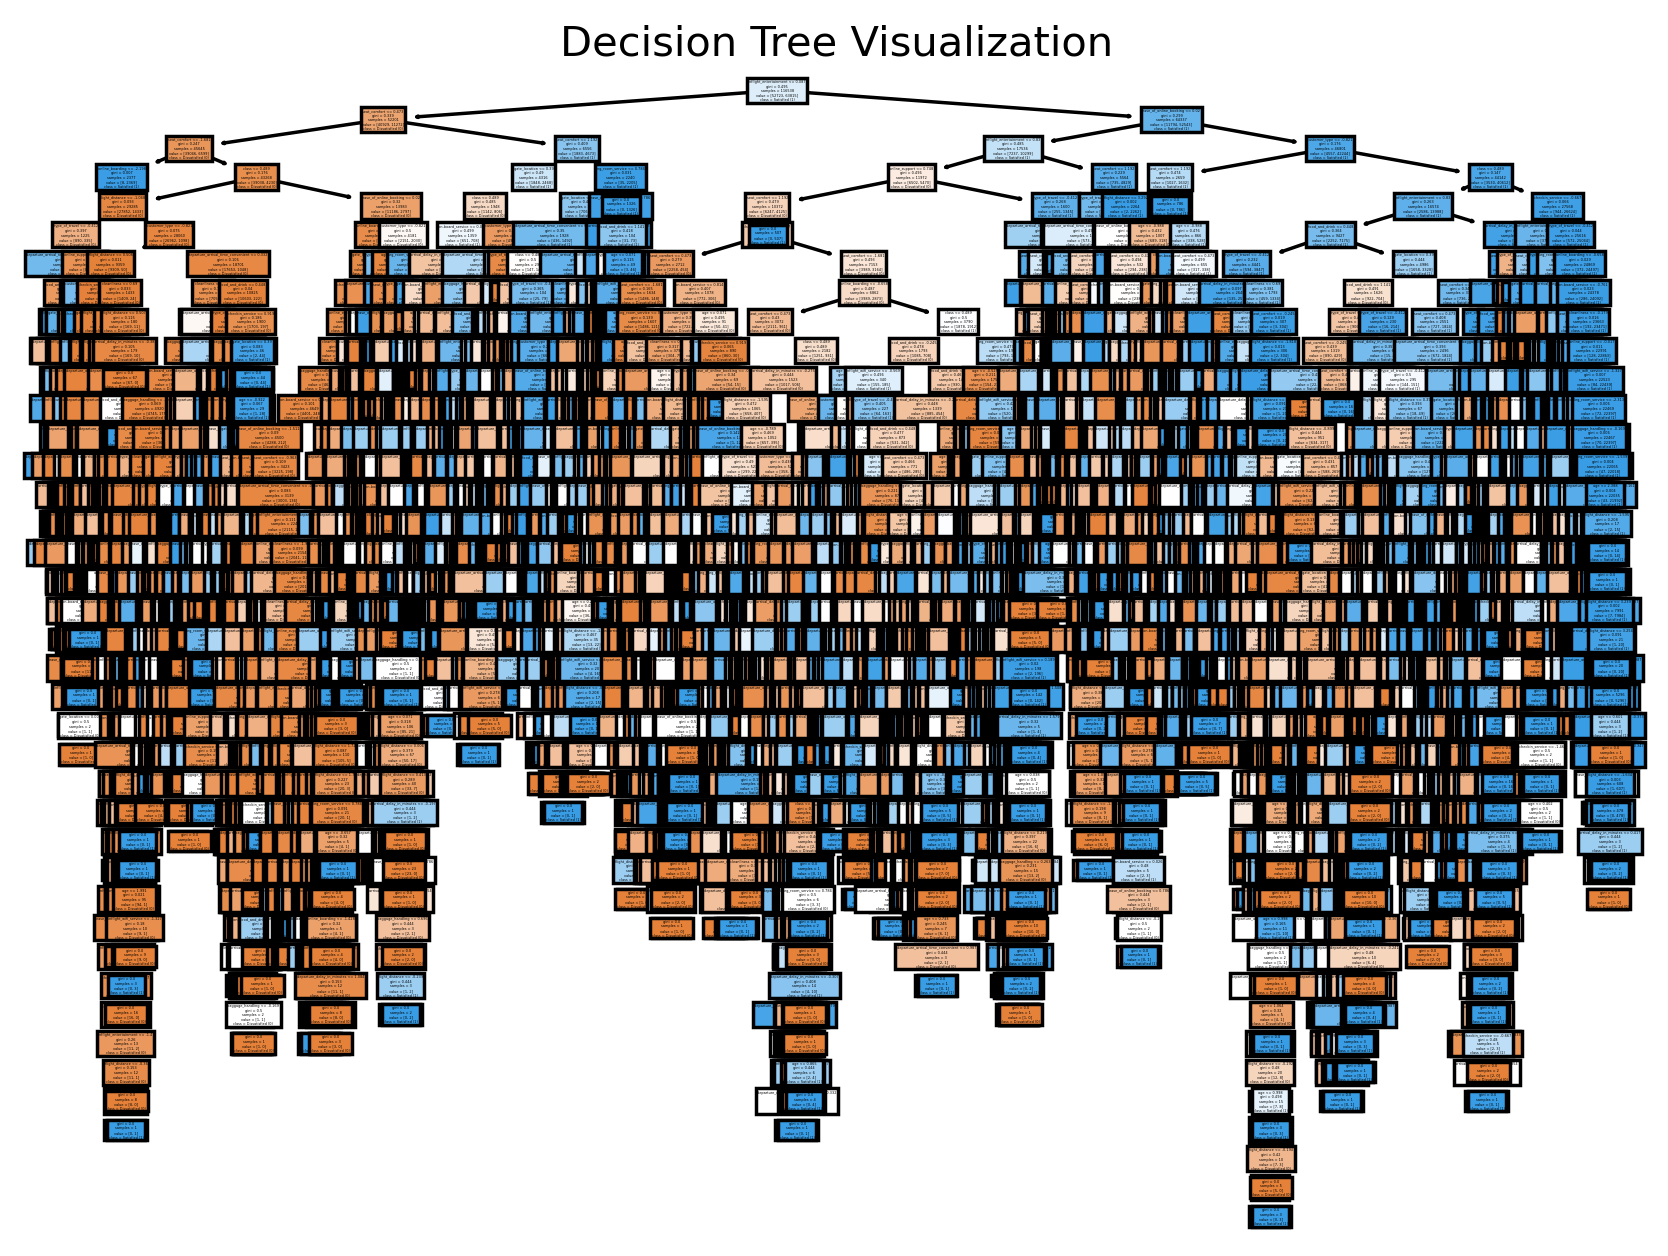

In [65]:
# Decision Tree Model
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print decison tree evaluation metrics
print("Decision Tree Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# plot decision tree
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(8,6), dpi=250)
plot_tree(model, filled=True, feature_names=X.columns, class_names=["Dissatisfied (0)", "Satisfied (1)"])               

plt.title("Decision Tree Visualization")
plt.show()


Random Forest Model:
Accuracy= 0.9549
Confusion Matrix:
[[5648  234]
 [ 350 6717]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      5882
           1       0.97      0.95      0.96      7067

    accuracy                           0.95     12949
   macro avg       0.95      0.96      0.95     12949
weighted avg       0.96      0.95      0.95     12949



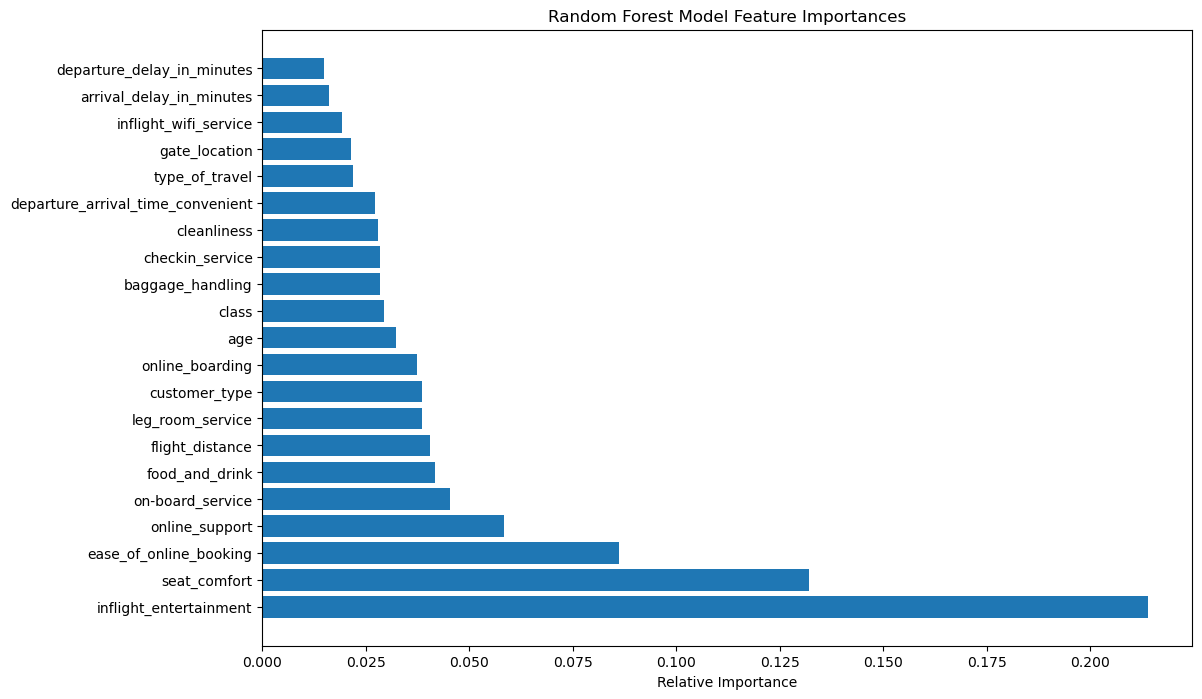

In [70]:
# Random Forest Model
model = RandomForestClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# print random forest evaluation metrics
print("\nRandom Forest Model:")
print(f"Accuracy= {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# get and plot feature importances
feature_importances = model.feature_importances_
plt.figure(figsize=(12, 8)) 
features = X.columns
indices = np.argsort(feature_importances)[::-1]  # sort in descending order

# plotting
plt.title("Random Forest Model Feature Importances")
plt.barh(range(len(features)), feature_importances[indices], align="center")
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()